### This notebook is for functions to calculate fantasy points by position

In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Passing Fantasy Points

In [20]:
qb = pd.read_csv('clean_data/passing.csv')
qb.head()

,Player,Tm_Abr,Cmp_Tot,Att_Tot,Cmp%_Tot,Yds_Tot,TD_Tot,TD%_Tot,Int_Tot,Int%_Tot,1D_Tot,Lng_Tot,Y/A_Tot,AY/A_Tot,Y/C_Tot,Y/G_Tot,Rate_Tot,QBR_Tot,Sk_Tot,Yds.1_Tot,Sk%_Tot,NY/A_Tot,ANY/A_Tot,Team,Pos,passing-plays-completed_home_Avg,passing-plays-completed_away_Avg,passing-plays-completed_division_Avg,passing-plays-completed_last_2_weeks_Avg,passing-plays-completed_last_4_weeks_Avg,passing-plays-completed_top_10_nfl_Avg,passing-plays-attempted_home_Avg,passing-plays-attempted_away_Avg,passing-plays-attempted_division_Avg,passing-plays-attempted_last_2_weeks_Avg,passing-plays-attempted_last_4_weeks_Avg,passing-plays-attempted_top_10_nfl_Avg,passing-gross-yards_home_Avg,passing-gross-yards_away_Avg,passing-gross-yards_division_Avg,passing-gross-yards_last_2_weeks_Avg,passing-gross-yards_last_4_weeks_Avg,passing-gross-yards_top_10_nfl_Avg,passing-touchdowns_home_Avg,passing-touchdowns_away_Avg,passing-touchdowns_division_Avg,passing-touchdowns_last_2_weeks_Avg,passing-touchdowns_last_4_weeks_Avg,passing-touchdowns_top_10_nfl_Avg,passing-plays-intercepted_home_Avg,passing-plays-intercepted_away_Avg,passing-plays-intercepted_division_Avg,passing-plays-intercepted_last_2_weeks_Avg,passing-plays-intercepted_last_4_weeks_Avg,passing-plays-intercepted_top_10_nfl_Avg,passing-longest-yards_home_Avg,passing-longest-yards_away_Avg,passing-longest-yards_division_Avg,passing-longest-yards_last_2_weeks_Avg,passing-longest-yards_last_4_weeks_Avg,passing-longest-yards_top_10_nfl_Avg,qb-rating-nfl_home,qb-rating-nfl_away,qb-rating-nfl_division_Avg,qb-rating-nfl_last_2_weeks_Avg,qb-rating-nfl_last_4_weeks_Avg,qb-rating-nfl_top_10_nfl_Avg,passing-2pt-conversions-succeeded_home_Avg,passing-2pt-conversions-succeeded_away_Avg,passing-2pt-conversions-succeeded_division_Avg,passing-2pt-conversions-succeeded_last_2_weeks_Avg,passing-2pt-conversions-succeeded_last_4_weeks_Avg,passing-2pt-conversions-succeeded_top_10_nfl_Avg
0,Tom Brady,TAM,485,719,67.5,5316,43,6.0,12,1.7,269,62,7.4,7.8,11.0,312.7,102.1,68.1,22,144,3.0,6.98,7.41,Tampa Bay Buccaneers,QB,28.10,29.22,27.17,0.0,30.00,33.50,43.10,42.11,40.33,0.0,54.0,51.25,308.70,314.33,298.50,0.0,329.00,375.75,2.80,2.00,2.83,0.0,1.00,2.00,0.50,0.89,0.67,0.0,1.0,0.75,62.0,62.0,62.0,0.0,55.0,58.0,103.1,98.0,105.6,0.0,72.2,94.0,0.00,0.00,0.00,0.0,0.0,0.00
1,Justin Herbert,LAC,443,672,65.9,5014,38,5.7,15,2.2,256,72,7.5,7.6,11.3,294.9,97.7,65.6,31,214,4.4,6.83,6.95,Los Angeles Chargers,QB,24.11,28.25,26.17,0.0,0.00,26.25,36.89,42.50,42.17,0.0,0.0,38.00,278.44,313.50,277.00,0.0,0.00,293.00,2.33,2.13,2.67,0.0,0.00,2.50,0.78,1.00,0.67,0.0,0.0,1.00,72.0,49.0,47.0,0.0,0.0,47.0,100.3,95.1,95.7,0.0,0.0,102.7,0.11,0.50,0.33,0.0,0.0,0.25
2,Matthew Stafford,LAR,404,601,67.2,4886,41,6.8,17,2.8,233,79,8.1,8.2,12.1,287.4,102.9,63.8,30,243,4.8,7.36,7.45,Los Angeles Rams,QB,24.55,23.20,23.25,26.0,28.33,25.70,35.91,34.60,34.00,40.0,41.0,38.60,288.27,290.30,274.50,283.0,328.67,301.50,2.55,2.20,2.00,3.0,2.33,2.20,0.82,1.10,1.00,2.0,1.0,1.20,75.0,79.0,68.0,35.0,70.0,79.0,106.6,100.9,100.1,89.9,101.9,96.2,0.09,0.10,0.00,0.0,0.0,0.10
3,Patrick Mahomes,KAN,436,658,66.3,4839,37,5.6,13,2.0,260,75,7.4,7.6,11.1,284.6,98.5,62.2,28,146,4.1,6.84,7.07,Kansas City Chiefs,QB,25.50,27.38,25.83,0.0,29.50,25.86,38.42,39.88,39.67,0.0,41.5,40.14,277.25,321.13,298.00,0.0,326.50,259.43,2.17,2.75,2.50,0.0,3.00,1.57,0.83,0.75,0.67,0.0,1.0,0.86,75.0,69.0,69.0,0.0,64.0,64.0,97.2,108.0,101.7,0.0,108.2,86.8,0.00,0.13,0.17,0.0,0.0,0.00
4,Derek Carr,LVR,428,626,68.4,4804,23,3.7,14,2.2,217,61,7.7,7.4,11.2,282.6,94.0,52.4,40,241,6.0,6.85,6.60,Las Vegas Raiders,QB,25.00,25.78,22.83,0.0,0.00,26.00,36.56,39.00,33.67,0.0,0.0,40.00,273.56,294.67,241.33,0.0,0.00,284.40,1.33,1.33,1.67,0.0,0.00,1.20,0.78,0.89,0.67,0.0,0.0,0.80,44.0,61.0,51.0,0.0,0.0,56.0,93.5,90.5,96.7,0.0,0.0,87.5,0.00,0.00,0.00,0.0,0.0,0.00


In [21]:
qb_fantasy_points = {
            'touchdown': 6,
            'pass_yds': 25,
            'interception': -2,
        }

In [22]:
qb['fantasy_pts'] = qb['TD_Tot'].multiply(qb_fantasy_points['touchdown']) + qb['Yds_Tot'].divide(qb_fantasy_points['pass_yds']) + qb['Int_Tot'].multiply(qb_fantasy_points['interception'])


In [44]:
qb[['Player', 'fantasy_pts']].head(10)

,Player,fantasy_pts
0,Tom Brady,446.64
1,Justin Herbert,398.56
2,Matthew Stafford,407.44
3,Patrick Mahomes,389.56
4,Derek Carr,302.16
5,Joe Burrow,360.44
6,Dak Prescott,379.96
7,Josh Allen,362.28
8,Kirk Cousins,352.84
9,Aaron Rodgers,378.60


In [45]:
qb.to_csv('./modeling_data/passing.csv', index=0)

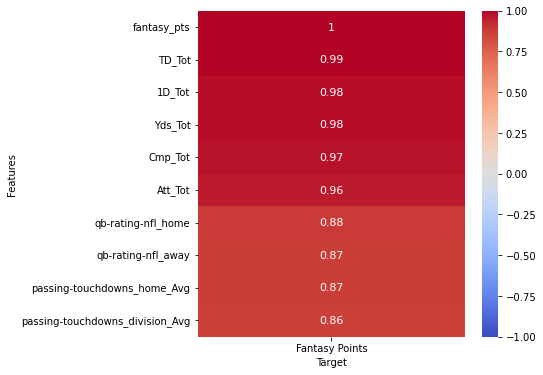

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(qb.corr()[['fantasy_pts']].sort_values(by='fantasy_pts', ascending=False).head(10), 
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

#### Rushing Fantasy Points`

In [25]:
rb = pd.read_csv('clean_data/rushing.csv')
rb.head()

,Player,Tm_Abr,G_Tot,GS_Tot,Att_Tot,Yds_Tot,TD_Tot,1D_Tot,Lng_Tot,Y/A_Tot,Y/G_Tot,Fmb_Tot,Team,Pos,rushing-plays_home_Avg,rushing-plays_division_Avg,rushing-plays_last_2_weeks_Avg,rushing-plays_last_4_weeks_Avg,rushing-plays_top_10_nfl_Avg,rushing-net-yards_home_Avg,rushing-net-yards_division_Avg,rushing-net-yards_last_2_weeks_Avg,rushing-net-yards_last_4_weeks_Avg,rushing-net-yards_top_10_nfl_Avg,rushing-yards-per-attempt_home_Avg,rushing-yards-per-attempt_division_Avg,rushing-yards-per-attempt_last_2_weeks_Avg,rushing-yards-per-attempt_last_4_weeks_Avg,rushing-yards-per-attempt_top_10_nfl_Avg,rushing-touchdowns_home_Avg,rushing-touchdowns_division_Avg,rushing-touchdowns_last_2_weeks_Avg,rushing-touchdowns_last_4_weeks_Avg,rushing-touchdowns_top_10_nfl_Avg,rushing-longest-yards_home_Avg,rushing-longest-yards_division_Avg,rushing-longest-yards_last_2_weeks_Avg,rushing-longest-yards_last_4_weeks_Avg,rushing-longest-yards_top_10_nfl_Avg,rushing-2pt-conversions-succeeded_home_Avg,rushing-2pt-conversions-succeeded_division_Avg,rushing-2pt-conversions-succeeded_last_2_weeks_Avg,rushing-2pt-conversions-succeeded_last_4_weeks_Avg,rushing-2pt-conversions-succeeded_top_10_nfl_Avg
0,Jonathan Taylor,IND,17.0,17.0,332.0,1811.0,18.0,107.0,83.0,5.5,106.5,4.0,Indianapolis Colts,RB,18.56,18.00,0.0,0.00,17.71,107.89,102.50,0.0,0.00,88.00,5.8,5.7,0.0,0.0,5.0,1.00,1.00,0.0,0.00,1.00,83.0,83.0,0.0,0.0,40.0,0.00,0.00,0.0,0.0,0.00
1,Najee Harris,PIT,17.0,17.0,307.0,1200.0,7.0,62.0,37.0,3.9,70.6,0.0,Pittsburgh Steelers,RB,20.00,18.00,0.0,0.00,15.00,80.56,73.50,0.0,0.00,48.88,4.0,4.1,0.0,0.0,3.3,0.33,0.33,0.0,0.00,0.13,37.0,37.0,0.0,0.0,21.0,0.00,0.00,0.0,0.0,0.00
2,Joe Mixon,CIN,16.0,16.0,292.0,1205.0,13.0,60.0,32.0,4.1,75.3,2.0,Cincinnati Bengals,HB,18.00,17.80,15.0,16.67,15.00,72.70,88.60,72.0,71.33,58.50,4.0,5.0,4.8,4.3,3.9,0.90,1.20,0.0,0.33,0.33,32.0,32.0,14.0,23.0,23.0,0.00,0.00,0.0,0.0,0.00
3,Antonio Gibson,WAS,16.0,14.0,258.0,1037.0,7.0,65.0,27.0,4.0,64.8,6.0,Washington Commanders,RB,18.00,13.00,0.0,0.00,15.00,67.71,61.20,0.0,0.00,52.29,3.8,4.7,0.0,0.0,3.5,0.57,0.40,0.0,0.00,0.29,27.0,27.0,0.0,0.0,17.0,0.14,0.00,0.0,0.0,0.14
4,Dalvin Cook,MIN,13.0,13.0,249.0,1159.0,6.0,57.0,66.0,4.7,89.2,3.0,Minnesota Vikings,RB,18.00,18.25,0.0,0.00,15.80,96.40,66.75,0.0,0.00,55.40,5.4,3.7,0.0,0.0,3.5,0.60,0.25,0.0,0.00,0.40,30.0,29.0,0.0,0.0,30.0,0.20,0.25,0.0,0.0,0.20


In [27]:
rb_fantasy_points = {
            'rush_touchdown': 6,
            'rush_yds': 1,
            'fumble': -2,
        }

In [36]:
rb['fantasy_pts'] = rb['TD_Tot'].multiply(rb_fantasy_points['rush_touchdown']) + rb['Yds_Tot'].divide(rb_fantasy_points['rush_yds']) + rb['Fmb_Tot'].multiply(rb_fantasy_points['fumble'])


In [43]:
rb[['Player', 'fantasy_pts']].head(10)

,Player,fantasy_pts
0,Jonathan Taylor,1911.0
1,Najee Harris,1242.0
2,Joe Mixon,1279.0
3,Antonio Gibson,1067.0
4,Dalvin Cook,1189.0
5,Alvin Kamara,922.0
6,Ezekiel Elliott,1060.0
7,Nick Chubb,1303.0
8,David Montgomery,889.0
9,Derrick Henry,995.0


In [46]:
rb.to_csv('./modeling_data/rushing.csv', index=0)

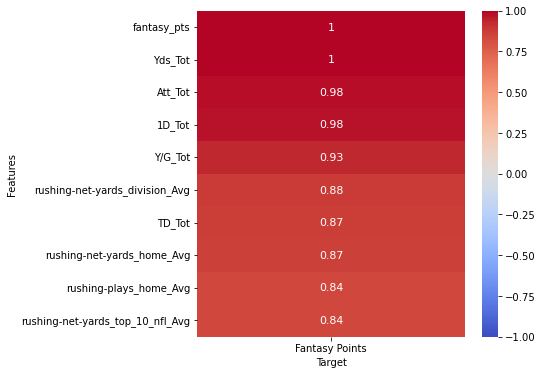

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(rb.corr()[['fantasy_pts']].sort_values(by='fantasy_pts', ascending=False).head(10), 
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');

#### Receiving Fantasy Points

In [48]:
wr = pd.read_csv('clean_data/receiving.csv')
wr.head()

,Player,Tm_Abr,G_Tot,GS_Tot,Tgt_Tot,Rec_Tot,Ctch%_Tot,Yds_Tot,Y/R_Tot,TD_Tot,1D_Tot,Lng_Tot,Y/Tgt_Tot,R/G_Tot,Y/G_Tot,Fmb_Tot,Team,Pos,receiving-receptions_home_Avg,receiving-receptions_division_Avg,receiving-receptions_last_2_weeks_Avg,receiving-receptions_last_4_weeks_Avg,receiving-receptions_top_10_nfl_Avg,receiving-yards_home_Avg,receiving-yards_division_Avg,receiving-yards_last_2_weeks_Avg,receiving-yards_last_4_weeks_Avg,receiving-yards_top_10_nfl_Avg,receiving-yards-per-catch_home_Avg,receiving-yards-per-catch_division_Avg,receiving-yards-per-catch_last_2_weeks_Avg,receiving-yards-per-catch_last_4_weeks_Avg,receiving-yards-per-catch_top_10_nfl_Avg,receiving-touchdowns_home_Avg,receiving-touchdowns_division_Avg,receiving-touchdowns_last_2_weeks_Avg,receiving-touchdowns_last_4_weeks_Avg,receiving-touchdowns_top_10_nfl_Avg,receiving-longest-yards_home_Avg,receiving-longest-yards_division_Avg,receiving-longest-yards_last_2_weeks_Avg,receiving-longest-yards_last_4_weeks_Avg,receiving-longest-yards_top_10_nfl_Avg,receiving-targeted_home_Avg,receiving-targeted_division_Avg,receiving-targeted_last_2_weeks_Avg,receiving-targeted_last_4_weeks_Avg,receiving-targeted_top_10_nfl_Avg,receiving-catch-rate_home_Avg,receiving-catch-rate_division_Avg,receiving-catch-rate_last_2_weeks_Avg,receiving-catch-rate_last_4_weeks_Avg,receiving-catch-rate_top_10_nfl_Avg,receiving-2pt-conversions-succeeded_home_Avg,receiving-2pt-conversions-succeeded_division_Avg,receiving-2pt-conversions-succeeded_last_2_weeks_Avg,receiving-2pt-conversions-succeeded_last_4_weeks_Avg,receiving-2pt-conversions-succeeded_top_10_nfl_Avg
0,Cooper Kupp,LAR,17.0,17.0,191.0,145.0,75.9,1947.0,13.4,16.0,89.0,59.0,10.2,8.5,114.5,0.0,Los Angeles Rams,WR,8.18,8.50,8.0,9.33,8.90,108.82,107.25,92.0,139.0,117.20,13.3,12.6,11.5,14.9,13.2,1.27,0.88,2.0,1.67,1.00,59.0,46.0,22.0,70.0,70.0,11.09,11.50,10.0,11.67,11.30,73.8,73.9,80.0,80.0,78.8,0.00,0.0,0.0,0.0,0.1
1,Davante Adams,GNB,16.0,16.0,169.0,123.0,72.8,1553.0,12.6,11.0,84.0,59.0,9.2,7.7,97.1,0.0,Green Bay Packers,WR,8.33,7.67,0.0,9.00,8.83,100.44,106.17,0.0,90.0,108.67,12.1,13.8,0.0,10.0,12.3,0.67,0.83,0.0,0.00,0.33,50.0,50.0,0.0,25.0,59.0,10.89,9.33,0.0,11.00,13.17,76.5,82.1,0.0,81.8,0.0,0.00,0.0,0.0,0.0,0.0
2,Tyreek Hill,KAN,17.0,16.0,159.0,111.0,69.8,1239.0,11.2,9.0,75.0,75.0,7.8,6.5,72.9,2.0,Kansas City Chiefs,WR,6.58,5.17,0.0,9.00,7.14,77.17,64.50,0.0,114.0,70.57,11.7,12.5,0.0,12.7,0.0,0.42,0.50,0.0,1.00,0.29,75.0,40.0,0.0,64.0,64.0,9.50,7.00,0.0,11.50,11.00,0.0,73.8,0.0,78.3,0.0,0.00,0.0,0.0,0.0,0.0
3,Justin Jefferson,MIN,17.0,17.0,167.0,108.0,64.7,1616.0,15.0,10.0,75.0,56.0,9.7,6.4,95.1,1.0,Minnesota Vikings,WR,6.50,6.83,0.0,0.00,6.00,102.25,114.50,0.0,0.0,90.86,15.7,16.8,0.0,0.0,15.1,0.75,0.83,0.0,0.00,0.43,56.0,56.0,0.0,0.0,56.0,9.25,10.00,0.0,0.00,9.43,70.3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Mark Andrews,BAL,17.0,9.0,153.0,107.0,69.9,1361.0,12.7,9.0,75.0,43.0,8.9,6.3,80.1,1.0,Baltimore Ravens,TE,6.33,6.33,0.0,0.00,6.40,82.11,81.33,0.0,0.0,91.00,13.0,12.8,0.0,0.0,14.2,0.67,0.50,0.0,0.00,0.60,43.0,39.0,0.0,0.0,43.0,9.44,10.33,0.0,0.00,8.20,0.0,0.0,0.0,0.0,78.0,0.22,0.0,0.0,0.0,0.0


In [49]:
wr_fantasy_points = {
            'rec_touchdown': 6,
            'rec_yds': 1,
            'fumble': -2,
        }

In [50]:
wr['fantasy_pts'] = wr['TD_Tot'].multiply(wr_fantasy_points['rec_touchdown']) + wr['Yds_Tot'].divide(wr_fantasy_points['rec_yds']) + wr['Fmb_Tot'].multiply(wr_fantasy_points['fumble'])


In [51]:
wr[['Player', 'fantasy_pts']].head(10)

,Player,fantasy_pts
0,Cooper Kupp,2043.0
1,Davante Adams,1619.0
2,Tyreek Hill,1289.0
3,Justin Jefferson,1674.0
4,Mark Andrews,1413.0
5,Diontae Johnson,1205.0
6,Keenan Allen,1172.0
7,Jaylen Waddle,1047.0
8,Stefon Diggs,1283.0
9,Hunter Renfrow,1082.0


In [53]:
wr.to_csv('./modeling_data/receiving.csv', index=0)

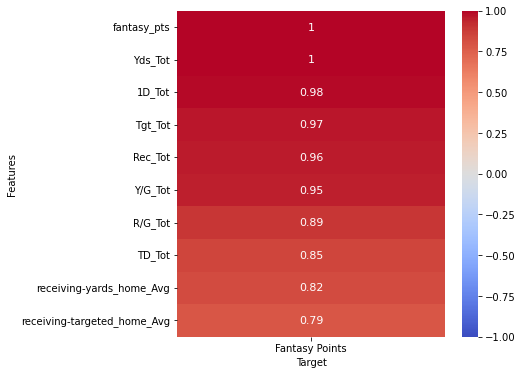

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
x_axis_labels = ['Fantasy Points',] # labels for x-axis
s = sns.heatmap(wr.corr()[['fantasy_pts']].sort_values(by='fantasy_pts', ascending=False).head(10),
                vmin=-1,
                vmax=1,
                xticklabels=x_axis_labels, 
                annot=True,
                annot_kws={'size': 11},
                cmap='coolwarm')
s.set(xlabel='Target', ylabel='Features');